# Directed Hypergraphs

In [1]:
import matplotlib.pyplot as plt

import xgi

A *directed hypergraph* (or *dihypergraph*), is a hypergraph which keeps track of senders and receivers in a given interaction. As defined in "Hypergraph Theory: An Introduction" by Alain Bretto, dihypergraphs are a set of nodes and a set of directed edges.

We define a directed hyperedge $\overrightarrow{e_i} \in E$ as an ordered pair $(e^+_i, e^-_i)$, where the *tail* of the edge, $e^+_i$, is the set of senders and the *head*, $e^-_i$, is the set of receivers. Both are subsets of the node set. We define the members of $\overrightarrow{e_i}$ as $e_i = e^+_i \cup e^-_i$ and the edge size as $s_i = |e_i|$. Likewise, we define the in-degree, out-degree, and degree of a node $i$ as
$$k^{in}_i = \sum_j^M {\bf 1}(i \in e^-_j),$$
$$k^{out}_i = \sum_j^M {\bf 1}(i \in e^+_j),$$
$$k_i = \sum_j^M {\bf 1}(i \in e_j),$$
respectively, where ${\bf 1}$ is the indicator function.

These types of hypergraphs are useful for representing, for example, chemical reactions (which have reactants and products) and emails (sender and receivers).

We start by building a dihypergraph.

### Building a dihypergraph

We can either build a dihypergraph node-by-node and edge-by-edge, or we can initialize a dihypergraph through its constructor.

We start by building a dihypergraph from the bottom up.

In [2]:
DH = xgi.DiHypergraph()
print(DH)

DH.add_node(0, name="test")
DH.add_edge(
    [{1, 2, 3}, {3, 4}]
)  # Notice that the head and the tail need not be disjoint.

DH.add_nodes_from([5, 6, 7])
edges = [[{1, 2}, {5, 6}], [{4}, {1, 3}]]
DH.add_edges_from(edges)
DH["name"] = "test"

print("Now that we've added nodes and edges, we have a " + str(DH))

Unnamed DiHypergraph with 0 nodes and 0 hyperedges
Now that we've added nodes and edges, we have a DiHypergraph named test with 8 nodes and 3 hyperedges


We can also add edge with attributes!

In [3]:
edges = [
    (([0, 1], [1, 2]), "one", {"color": "red"}),
    (([2, 3, 4], []), "two", {"color": "blue", "age": 40}),
]
DH.add_edges_from(edges)

We can also use the constructor to initialize a dihypergraph:

In [4]:
# from a list
DH1 = xgi.DiHypergraph([[{1, 2}, {5, 6}], [{4}, {1, 3}]])

# from a dict
DH2 = xgi.DiHypergraph({1: ({1, 2, 3}, {3, 4}), 2: ({1, 2}, {3})})

# from another dihypergraph
DH3 = xgi.DiHypergraph(DH1)

### Drawing
We can draw a dihypergraph using the function `draw_bipartite()`

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x139f08c90>,
  <matplotlib.collections.PathCollection at 0x139f0a8d0>))

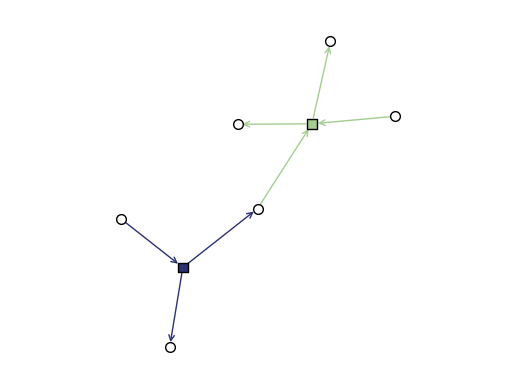

In [5]:
xgi.draw_bipartite(DH1)

### Views

Nodes and edges are represented by `DiNodeView` and `DiEdgeView` respectively.

In [6]:
DH.nodes

DiNodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [7]:
DH.edges

DiEdgeView((0, 1, 2, 'one', 'two'))

We can access directed edges with the `dimembers()` method and the union of the head and tail with `members()`.

In [8]:
print("Edge 0:")
print(DH.edges.dimembers(0))
print(DH.edges.members(0))
print("\nThe edge list as a whole:")
print(DH.edges.dimembers())
print(DH.edges.members())

Edge 0:
({1, 2, 3}, {3, 4})
{1, 2, 3, 4}

The edge list as a whole:
[({1, 2, 3}, {3, 4}), ({1, 2}, {5, 6}), ({4}, {1, 3}), ({0, 1}, {1, 2}), ({2, 3, 4}, set())]
[{1, 2, 3, 4}, {1, 2, 5, 6}, {1, 3, 4}, {0, 1, 2}, {2, 3, 4}]


The naming convention is the same for node memberships.

In [9]:
print("memberships for node 0:")
print(DH.nodes.dimemberships(0))
print(DH.nodes.memberships(0))

print("\nAll node memberships:")
print(DH.nodes.dimemberships())
print(DH.nodes.memberships())

memberships for node 0:
(set(), {'one'})
{'one'}

All node memberships:
{0: (set(), {'one'}), 1: ({2, 'one'}, {0, 1, 'one'}), 2: ({'one'}, {0, 1, 'two'}), 3: ({0, 2}, {0, 'two'}), 4: ({0}, {2, 'two'}), 5: ({1}, set()), 6: ({1}, set()), 7: (set(), set())}
{0: {'one'}, 1: {0, 1, 2, 'one'}, 2: {0, 1, 'one', 'two'}, 3: {0, 2, 'two'}, 4: {0, 2, 'two'}, 5: {1}, 6: {1}, 7: set()}


We can also access the head and tail of an edge:

In [10]:
print("Head and tail of edge 0:")
print(DH.edges.head(0))
print(DH.edges.tail(0))

print("\nThe head as a whole:")
print(DH.edges.head())

print("\nThe tail as a whole:")
print(DH.edges.tail())

Head and tail of edge 0:
{3, 4}
{1, 2, 3}

The head as a whole:
[{3, 4}, {5, 6}, {1, 3}, {1, 2}, set()]

The tail as a whole:
[{1, 2, 3}, {1, 2}, {4}, {0, 1}, {2, 3, 4}]


### Stats

The `DiNodeStat` and `DiEdgeStat` represent directed node and edge statistics. For nodes, we have `in_degree`, `out_degree`, and `degree` and for edges, we have `size`, `order`, `head_size`, and `tail_size`.

In [11]:
s = DH.edges.size.asnumpy()
s_in = DH.edges.head_size.asnumpy()
s_out = DH.edges.tail_size.asnumpy()

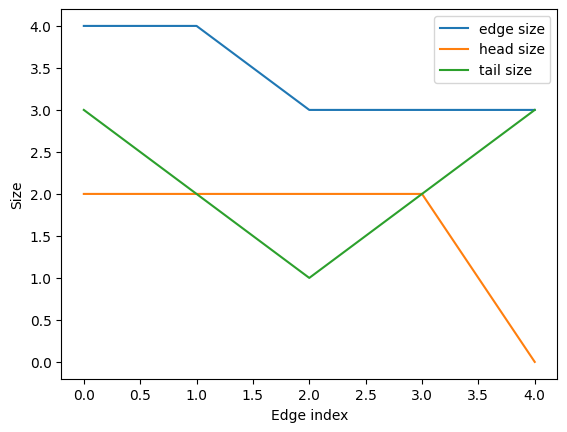

In [12]:
plt.plot(s, label="edge size")
plt.plot(s_in, label="head size")
plt.plot(s_out, label="tail size")
plt.legend()
plt.ylabel("Size")
plt.xlabel("Edge index")
plt.show()

In [13]:
k = DH.nodes.degree.asnumpy()
k_in = DH.nodes.in_degree.asnumpy()
k_out = DH.nodes.out_degree.asnumpy()

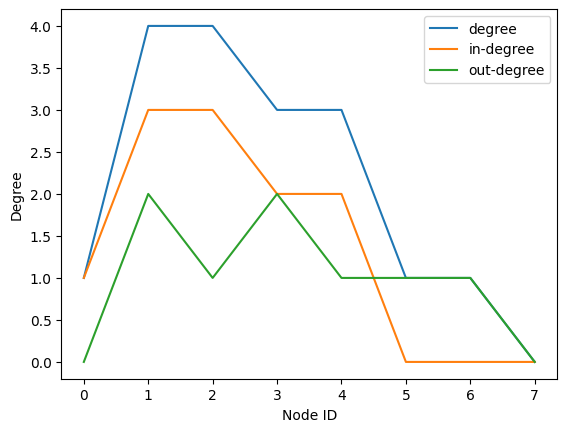

In [14]:
plt.plot(k, label="degree")
plt.plot(k_in, label="in-degree")
plt.plot(k_out, label="out-degree")
plt.legend()
plt.ylabel("Degree")
plt.xlabel("Node ID")
plt.show()

We can convert from dihypergraphs to hypergraphs through the constructor...

In [15]:
H = xgi.Hypergraph(DH1)
H.edges.members()

[{1, 2, 5, 6}, {1, 3, 4}]

...or through the convert module.

In [16]:
H = xgi.to_hypergraph(DH1)
H.edges.members()

[{1, 2, 5, 6}, {1, 3, 4}]